<a href="https://colab.research.google.com/github/InGev007/startup_acd/blob/main/lesson%2054/Lesson_54.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 54

##Завдання:
Використовуючи наведений в лекції датасет і код, створіть на основі двошарової нейромережі тришарову. Оцініть її похибку та точність визначення класів.
Після цього використайте для оцінки похибки Mean Squared Error (синтаксис – за посиланням), в якості оптимізатора – Adam (синтаксис – за посиланням). Порівняйте, чи змінилась похибка та точність.

In [1]:
!pip install torch torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchviz

In [3]:
class ThreeLayersNet(nn.Module):
    def __init__(self, nX, nH1, nH2, nY):        
        super(ThreeLayersNet, self).__init__()     # конструктор
         
        self.fc1 = nn.Linear(nX, nH1)             # створення параметрів моделі
        self.fc2 = nn.Linear(nH1, nH2)
        self.fc3 = nn.Linear(nH2, nY)             # у повнозв'язкових шарах
          
    def forward(self, x):                        # задаємо прямий прохід
        x = self.fc1(x)                          # вихід першого шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація
        x = self.fc2(x)                          # вихід другого шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація
        x = self.fc3(x)                          
        x = nn.Sigmoid()(x)
        return x
          
model = ThreeLayersNet(2, 5, 5, 1)                    # створення екземпляру класу

In [4]:
X = torch.rand (1200, 2)                       
Y = (torch.sum((X - 0.5)**2, axis=1) < 0.1).float().view(-1,1)

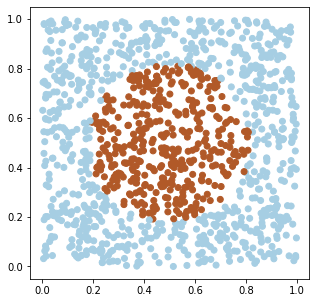

In [5]:
plt.figure (figsize=(5, 5))
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c=Y.numpy()[:,0],cmap=plt.cm.Paired)        
plt.show() 

In [6]:
model = ThreeLayersNet(2, 5, 5, 1)

loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.5)

In [7]:
def fit(model, X,Y, batch_size=100, train=True):    
      model.train(train)                                 
      sumL, sumA, numB = 0, 0, int( len(X)/batch_size ) 
       
      for i in range(0, numB*batch_size, batch_size):          
        xb = X[i: i+batch_size]                          # поточний батч
        yb = Y[i: i+batch_size]                          # тензори поточного батчу
                      
        y = model(xb)                                    # пряме розповсюдження
        L = loss(y, yb)                                  # похибка
  
        if train:                                        # в режимі навчання
            optimizer.zero_grad()                        # обнуляємо градієнти,        
            L.backward()                                 # обчислюємо градієнти,            
            optimizer.step()                             # підганяємо параметри
                                     
        sumL += L.item()                                 # сумарна похибка
        sumA += (y.round() == yb).float().mean()         # точність визначення окремого класу
         
        return sumL/numB,  sumA/numB   

In [8]:
                                                         # режим оцінки моделі
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model, X,Y) )
 
epochs = 1000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model, X, Y)                               # по всьому датасету
     
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0224 accuracy: 0.0275
epoch:     0 loss: 0.0211 accuracy: 0.0558
epoch:   100 loss: 0.0038 accuracy: 0.0783
epoch:   200 loss: 0.0000 accuracy: 0.0833
epoch:   300 loss: 0.0000 accuracy: 0.0833
epoch:   400 loss: 0.0000 accuracy: 0.0833
epoch:   500 loss: 0.0000 accuracy: 0.0833
epoch:   600 loss: 0.0000 accuracy: 0.0833
epoch:   700 loss: 0.0000 accuracy: 0.0833
epoch:   800 loss: 0.0000 accuracy: 0.0833
epoch:   900 loss: 0.0000 accuracy: 0.0833
epoch:   999 loss: 0.0000 accuracy: 0.0833


In [9]:
print(model)

ThreeLayersNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
)


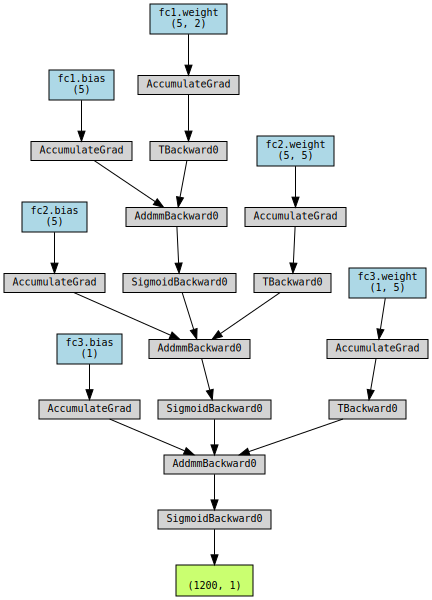

In [10]:
torchviz.make_dot(model(X), params = dict(model.named_parameters()))

## Висновок: 
Тришарова модель має кращі показники похибки та точності